## Exercice on Time Series similarity 

0) read the data in a dataframe and ensure that value scaling is applied (e.g., Z_Normalization)

1) Implement the DTW algorithm using the introduced Dynamic Programming procedure.

### Note: You can implement Euclidean distance with your own routine, otherwise you can find it in many different libraries (e,g, scipy.spatial.distance.euclidean) 

2) Implement a simple sequential scan, to find the nearest neighbor (match with the smallest distance) of each series in the dataset. Use the Euclidean distance.

### Note: In the following exercices it will be mandatory to use the DTW distance implemented in the exercice 1.
### LB_Keogh impl can be found here: tslearn.metrics

3)  Implement a simple sequential scan, to find the nearest neighbor (match with the smallest distance) of each series in the dataset. Use Dynamic Warping.

4) Implement a smart sequential scan (using (LB) lower-bounding measure to prune the search space)  to find the nearest neighbor (match with the smallest distance) of each series in the dataset. Use Dynamic Warping and the relative LB.

5) Record and compare computation time of the different solutions

In [2]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os 

import dtaidistance
import math
from dtaidistance import dtw

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

import math
import timeit
from timeit import default_timer as timer
from tslearn import metrics

<Axes: >

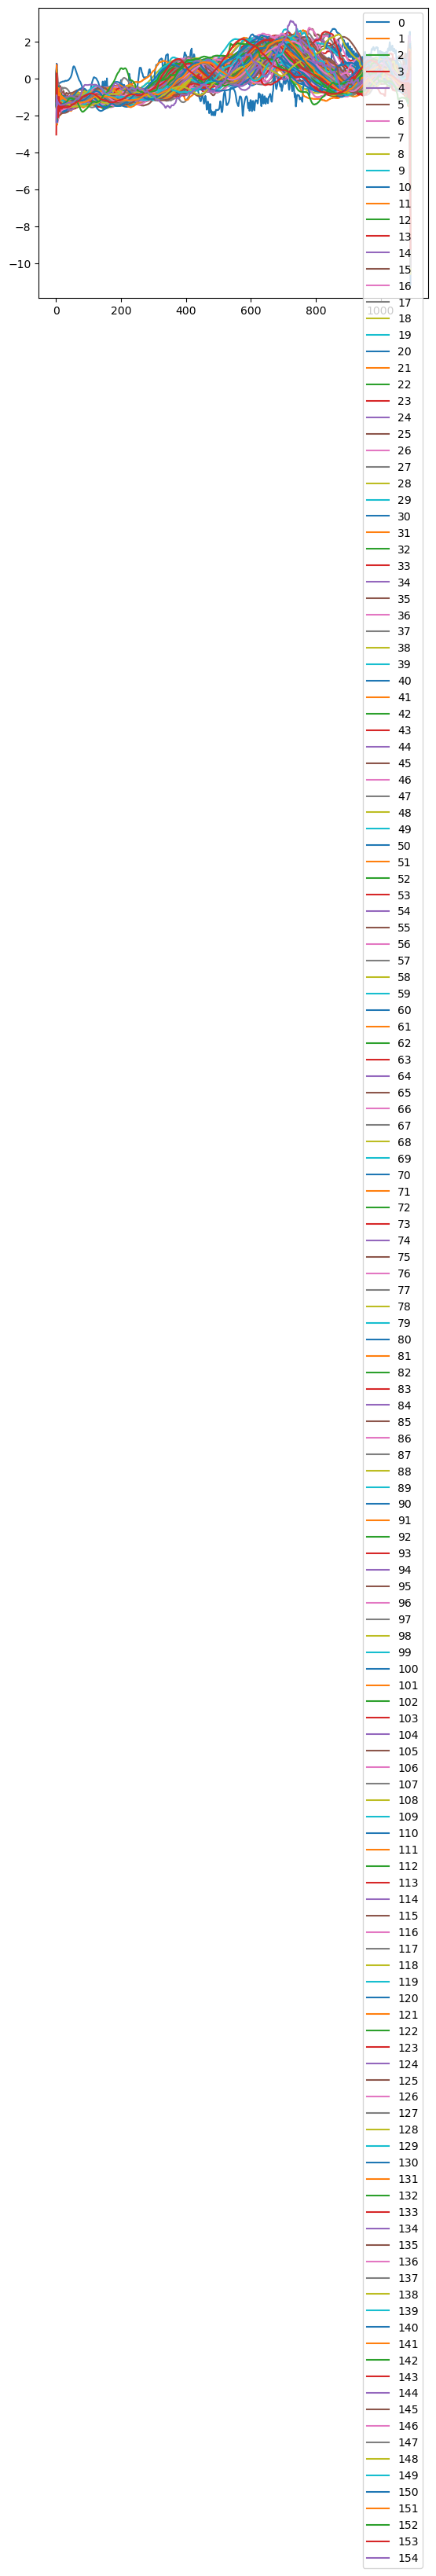

In [3]:
# read Haptics motion time series (UCR Time Series Classification Archive) 

HapticsTS = pd.read_csv(os.path.join("data","Haptics","Haptics_TRAIN.tsv"),sep="\t", header=None)
HapticsTS = HapticsTS.drop(0, axis = 1)
HapticsTS.transpose().plot()

In [4]:
HapticsTS.head()

,1,2,3,4,5,6,7,8,9,10,...,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092
0,-1.047477,0.548336,-0.259562,-1.581216,-1.915218,-1.278188,-0.691525,-0.785471,-1.254217,-1.485490,...,-0.062936,0.280924,-0.071737,-0.872673,-1.031787,0.058567,1.399485,0.896761,-2.691291,-8.196283
1,-1.018153,0.514133,-0.097370,-1.374493,-1.957364,-1.567188,-0.906353,-0.719380,-1.059379,-1.459547,...,0.375688,0.308811,-0.353281,-0.939404,-0.583731,0.698780,1.645471,0.557882,-3.187261,-8.316916
2,-1.183382,0.339636,0.045998,-1.080209,-1.934357,-1.972025,-1.412721,-0.877084,-0.792141,-1.108538,...,-0.169072,-0.775355,-1.318858,-1.159807,-0.159063,1.002750,1.113615,-0.791413,-4.643261,-9.216530
3,-0.896969,0.186145,0.578290,0.392361,-0.157240,-0.818047,-1.374046,-1.678971,-1.689535,-1.459605,...,0.138206,0.877230,1.441031,1.556109,1.005197,-0.308639,-2.323515,-4.812357,-7.448790,-9.872887
4,-1.009424,0.614673,-0.397552,-1.766144,-1.906942,-1.145026,-0.717200,-1.041896,-1.525240,-1.563815,...,-0.546236,-0.024516,-0.031732,-0.793309,-1.317245,-0.510563,1.029388,1.012195,-2.366606,-8.128357


In [5]:

def DTW(Q,C,r):
    
    r = max (r, abs(len(Q) - len (C)))
    
    dtwM = [[float('inf') for _ in range(len(C))] for _ in range(len(Q))]
    dtwM[0][0] = (Q[0] - C[0]) * (Q[0] - C[0])
    
    for i in range(1,len(Q)):
        for j in range( max(1,i-r), min (len(C),i+r)):
            dtwM[i][j] = ((Q[i] - C[j]) * (Q[i] - C[j])) + min( dtwM[i-1][j] , dtwM[i-1][j-1], dtwM[i][j-1] )
    

    return math.sqrt(dtwM[len(Q)-1][len(C)-1])

# quick test

Q = [1.,2.,3.,4, 5.]
C = [2.,3.,4, 5., 0.]

print("DTW impl :" + str(DTW(Q,C,3)))
print("DTW dtaidistance :" + str(dtw.distance(Q,C,window =3)))



DTW impl :5.196152422706632
DTW dtaidistance :5.0990195135927845


In [6]:
# sequential scan with ED


startTimeScan = timeit.default_timer()
    
for i, tsQ in HapticsTS.iterrows():
    bsf = float('inf')
    bestMatch = -1
    
    startTimeQuery = timeit.default_timer()
    
    for j, tsD in HapticsTS.iterrows():
        if i!=j:
            dist = math.dist(tsQ.values,tsD.values)
            if dist<=bsf:
                bsf = dist
                bestMatch = j
    print("Best match of "+str(i)+": "+str(bestMatch)+ " with dist = "+str(bsf)+" computed in "+str(timeit.default_timer() - startTimeQuery)+" seconds")

print("Total time scan: "+str(timeit.default_timer() - startTimeScan)+" seconds")
     

Best match of 0: 64 with dist = 5.458347383866529 computed in 0.01890670000011596 seconds
Best match of 1: 118 with dist = 7.533720045629726 computed in 0.017580800000132513 seconds
Best match of 2: 147 with dist = 4.758405473328453 computed in 0.01702290000002904 seconds
Best match of 3: 44 with dist = 9.908461573970056 computed in 0.0166917999999896 seconds
Best match of 4: 83 with dist = 10.3057918857025 computed in 0.01669620000006944 seconds
Best match of 5: 107 with dist = 5.674366236803041 computed in 0.016721899999993184 seconds
Best match of 6: 44 with dist = 11.671037621508168 computed in 0.01664699999992081 seconds
Best match of 7: 79 with dist = 13.250257537686045 computed in 0.01676169999996091 seconds
Best match of 8: 36 with dist = 5.447168414261922 computed in 0.01666839999984404 seconds
Best match of 9: 104 with dist = 7.91227977828162 computed in 0.016729000000168526 seconds
Best match of 10: 129 with dist = 15.844481686799991 computed in 0.016934200000150668 seconds


Best match of 94: 63 with dist = 6.205429551790228 computed in 0.017688399999997273 seconds
Best match of 95: 127 with dist = 5.442797286726056 computed in 0.01659719999997833 seconds
Best match of 96: 86 with dist = 7.330180535228147 computed in 0.017769399999906454 seconds
Best match of 97: 143 with dist = 8.930326456189116 computed in 0.01684290000002875 seconds
Best match of 98: 88 with dist = 7.597289038975689 computed in 0.01685340000017277 seconds
Best match of 99: 138 with dist = 7.313181240232577 computed in 0.016666699999859702 seconds
Best match of 100: 4 with dist = 14.277736202265498 computed in 0.016718200000013894 seconds
Best match of 101: 149 with dist = 9.644934751449444 computed in 0.017456399999900896 seconds
Best match of 102: 61 with dist = 9.513004676558694 computed in 0.01731559999984711 seconds
Best match of 103: 42 with dist = 4.990306822760742 computed in 0.017586700000038036 seconds
Best match of 104: 151 with dist = 7.320019365339366 computed in 0.017359400

In [7]:
# sequential scan with dtw


for i, tsQ in HapticsTS.iterrows():
    bsf = float('inf')
    bestMatch = -1
    
    startTimeQuery = timeit.default_timer()
    
    for j, tsD in HapticsTS.iterrows():
        if i!=j:
            dist = DTW(tsQ.values,tsD.values,10)
            if dist<=bsf:
                bsf = dist
                bestMatch = j
    print("Best match of "+str(i)+": "+str(bestMatch)+ " with dist = "+str(bsf)+" computed in "+str(timeit.default_timer() - startTimeQuery)+" seconds")
            

Best match of 0: 64 with dist = 2.4529068700054855 computed in 24.617382700000007 seconds
Best match of 1: 118 with dist = 5.017643815885145 computed in 24.89158469999984 seconds
Best match of 2: 147 with dist = 3.353743569810914 computed in 25.08580670000015 seconds
Best match of 3: 44 with dist = 6.927135877016723 computed in 25.28344070000003 seconds
Best match of 4: 83 with dist = 7.445174059257006 computed in 25.812911600000007 seconds
Best match of 5: 107 with dist = 3.245753473485508 computed in 26.973167699999976 seconds
Best match of 6: 44 with dist = 8.889139454156322 computed in 25.85400279999999 seconds
Best match of 7: 79 with dist = 10.440868624694684 computed in 26.19321620000005 seconds
Best match of 8: 36 with dist = 3.100510509196959 computed in 25.993085699999938 seconds
Best match of 9: 104 with dist = 5.190745363702984 computed in 25.97171470000012 seconds
Best match of 10: 54 with dist = 10.696844300107058 computed in 25.314632299999857 seconds
Best match of 11: 7

KeyboardInterrupt: 

In [9]:
# sequential scan with dtw lb (lbKeogh)

warpingWindow = 10



for i, tsQ in HapticsTS.iterrows():
    bsf = float('inf')
    bestMatch = -1
    
    startTimeQuery = timeit.default_timer()
    # compute U and L for LB keogh
    envelope_down, envelope_up = metrics.lb_envelope(tsQ.values, radius=warpingWindow)
    
    for j, tsD in HapticsTS.iterrows():
        if i!=j:
            
            #comptue the LB
            lb_keogh = metrics.lb_keogh(tsD.values,envelope_candidate=(envelope_down, envelope_up))
        
            
            if(lb_keogh < bsf):
                dist = DTW(tsQ.values,tsD.values,warpingWindow)
                if dist<=bsf:
                    bsf = dist
                    bestMatch = j
                    
    print("Best match of "+str(i)+": "+str(bestMatch)+ " with dist = "+str(bsf)+" computed in "+str(timeit.default_timer() - startTimeQuery)+" seconds")

print("Total time scan: "+str(timeit.default_timer() - startTimeScan)+" seconds")

Best match of 0: 64 with dist = 2.4529068700054855 computed in 1.3270090000000891 seconds
Best match of 1: 118 with dist = 5.017643815885145 computed in 1.697956299999987 seconds
Best match of 2: 147 with dist = 3.353743569810914 computed in 3.8384264000001167 seconds
Best match of 3: 44 with dist = 6.927135877016723 computed in 0.6496864000000642 seconds
Best match of 4: 83 with dist = 7.445174059257006 computed in 1.1548127000000932 seconds
Best match of 5: 107 with dist = 3.245753473485508 computed in 1.9685183000001416 seconds
Best match of 6: 44 with dist = 8.889139454156322 computed in 0.6589702999999645 seconds
Best match of 7: 79 with dist = 10.440868624694684 computed in 1.2951751000000513 seconds
Best match of 8: 36 with dist = 3.100510509196959 computed in 1.2944305999999415 seconds
Best match of 9: 104 with dist = 5.190745363702984 computed in 2.7598837999998977 seconds
Best match of 10: 54 with dist = 10.696844300107058 computed in 1.9383998000002975 seconds
Best match of 

Best match of 91: 84 with dist = 7.472125122473379 computed in 0.8314263999996001 seconds
Best match of 92: 119 with dist = 5.257698222688782 computed in 1.8322032999999465 seconds
Best match of 93: 146 with dist = 3.1850174683368424 computed in 1.6453098000001773 seconds
Best match of 94: 63 with dist = 4.042133673821048 computed in 1.1644639000001007 seconds
Best match of 95: 127 with dist = 3.645445943874256 computed in 1.4857624000001124 seconds
Best match of 96: 2 with dist = 5.423570739218566 computed in 1.8680855000002339 seconds
Best match of 97: 8 with dist = 5.001796589478703 computed in 1.2516539999996894 seconds
Best match of 98: 88 with dist = 4.910109314230425 computed in 1.176916799999617 seconds
Best match of 99: 138 with dist = 4.3991945581213185 computed in 2.3675805999996555 seconds
Best match of 100: 130 with dist = 11.911425247231211 computed in 0.6702068000004147 seconds
Best match of 101: 149 with dist = 7.06874814674502 computed in 1.9784850000000915 seconds
Bes